In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix1.csv to netflix1 (1).csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['netflix1.csv']))

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [ ]:
df.drop_duplicates()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [ ]:
len(df)

8790

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
types =df.groupby(['type',]).type.count().reset_index(name='count')
#types=types.set_index('type')
types

,type,count
0,Movie,6126
1,TV Show,2664


In [ ]:
types =df.groupby(['type',]).type.count().reset_index(name='count')
types=types.set_index('type')
types

,count
type,
Movie,6126
TV Show,2664


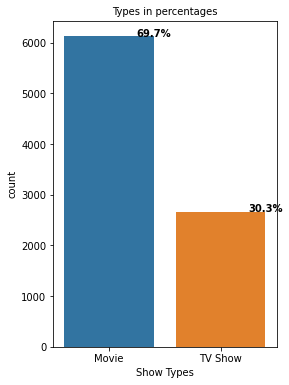

In [ ]:
# ax = sb.barplot(x="type", y="type", data=df, estimator=lambda x: len(x) / len(df) * 100)
# ax.set(ylabel="Percent of type")
plt.figure(figsize=[4, 6])
total = float(len(df))
ax = sb.countplot(x="type", data=df)
plt.title('Types in percentages', fontsize=10)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', weight='bold')
plt.xlabel('Show Types')
plt.show();


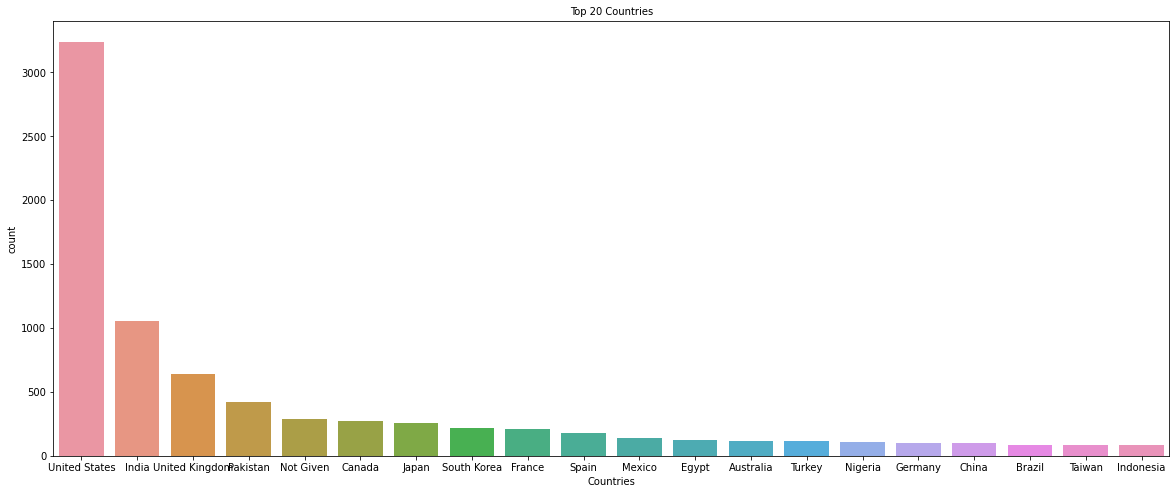

In [ ]:
plt.figure(figsize=[20, 8])
plt.title('Top 20 Countries', fontsize=10)
sb.countplot(x='country',data=df,order=pd.value_counts(df['country']).iloc[:20].index)
plt.xlabel('Countries')
plt.show();

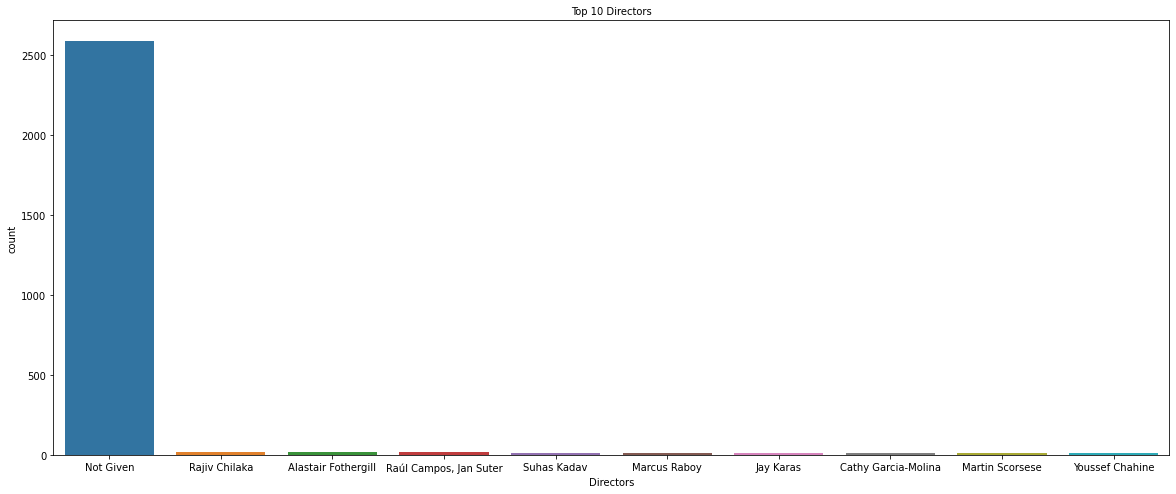

In [ ]:
plt.figure(figsize=[20, 8])
plt.title('Top 10 Directors', fontsize=10)
sb.countplot(x='director',data=df,order=pd.value_counts(df['director']).iloc[:10].index)
plt.xlabel('Directors')
plt.show();

In [ ]:
df2 = df['listed_in'].str.split(',', expand=True)
df_concat = pd.concat([df, df2], axis=1)
df_concat.head()
# pd.concat([df, df['listed_in'].str.split(', ', expand=True)], axis=1)
# df.head()

# plt.figure(figsize=[20, 8])
# plt.title('Top 20 Countries', fontsize=10)
# sb.countplot(x='country',data=df,order=pd.value_counts(df['country']).iloc[:20].index)
# plt.xlabel('Countries')
# plt.show();

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,0,1,2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,Documentaries,None,None
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,None
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies


In [ ]:
df3 = df.groupby(['rating','type']).type.count().reset_index(name='count').value_counts()
# df3.reset_index(inplace=True)
# df3_plot=sb.barplot(df3.index, df3.values)
#type(df3)
df3.head()

rating    type     count
G         Movie    41       1
TV-MA     Movie    2062     1
TV-Y7-FV  TV Show  1        1
          Movie    5        1
TV-Y7     TV Show  194      1
dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


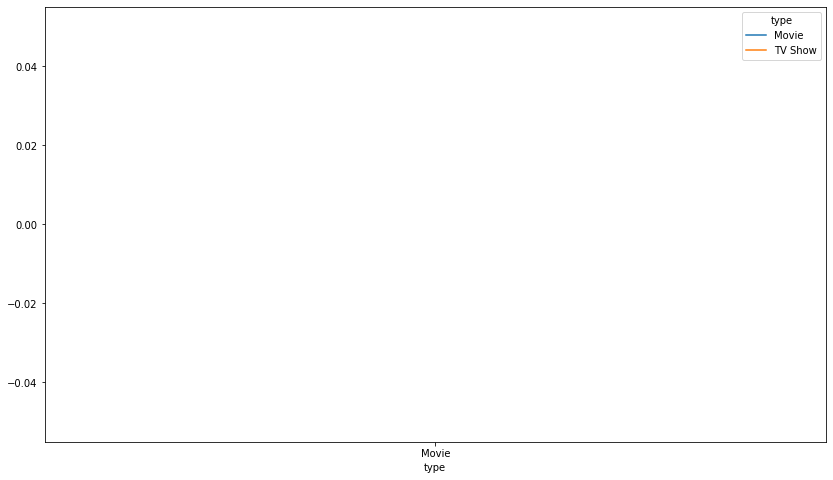

In [ ]:
plt.figure(figsize=[14,8])
#sb.lineplot(x=df.start_hour,y=df.duration_sec)
sb.lineplot(data=df, x="type", hue="type")
plt.show()

In [ ]:
_directors = df['director'].value_counts()[:10]
_directors

Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: director, dtype: int64